<a href="https://colab.research.google.com/github/rajanpandi/dvd_data/blob/main/final_proj_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

In [25]:
df=pd.read_csv("/content/combine1_data.csv")

In [26]:
pd.set_option('display.max_columns',None)

In [27]:
df.head(1)

,category_id,name,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id,rental_id,rental_date,customer_id,return_date,staff_id,amount,payment_id,payment_date,actor_id,first_name,last_name,name-2
0,11.0,Horror,749.0,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006.0,1.0,6.0,4.99,153.0,19.99,R,3419.0,1.0,1520.0,2005-06-15 23:57:20,341.0,2005-06-24 23:46:20,1.0,7.99,17503.0,2007-02-15 22:25:46.996577,161.0,Harvey,Hope,English


In [28]:
df1=df.loc[:,["category_id","rating","customer_id","actor_id"]]

In [29]:
df1.head(1)

,category_id,rating,customer_id,actor_id
0,11.0,R,341.0,161.0


In [30]:
df1.dtypes

,0
category_id,float64
rating,object
customer_id,float64
actor_id,float64


In [31]:
df1.isnull().sum()

,0
category_id,5
rating,5
customer_id,231
actor_id,45


In [32]:
df1.dropna(inplace=True)

In [33]:
df1.duplicated().sum()

1651

In [34]:
df1.drop_duplicates(inplace=True)

In [35]:
df1.shape

(86353, 4)

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
for i in df1.columns:
  df1[i]=le.fit_transform(df1[i])

In [38]:
x=df1.drop("category_id",axis=1)
y=df1["category_id"]

In [39]:
from keras.utils import to_categorical
y_new=to_categorical(y)

In [40]:
y_new.shape

(86353, 16)

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaler=sc.fit_transform(x)

In [42]:
x_scaler

array([[ 1.4096435 ,  0.25333951,  1.05588702],
       [ 1.4096435 ,  0.25333951,  0.45834543],
       [ 1.4096435 ,  0.25333951, -0.4203922 ],
       ...,
       [-1.49131084, -1.2333091 , -0.22706992],
       [-1.49131084, -1.2333091 , -0.40281745],
       [-1.49131084, -1.2333091 , -1.51002687]])

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y_new,test_size=0.25,random_state=0)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU
import tensorflow as tf

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
model = Sequential()
#input dimension 8 neuron - developer scope
model.add(Dense(512,input_dim = x_train.shape[1],activation='tanh')) #hidden layer1
model.add(Dense(512,activation='tanh')) #hidden layer2
model.add(Dense(256,activation='tanh')) #hidden layer3
model.add(Dense(128,activation='tanh')) #hidden layer3
model.add(Dense(64,activation='tanh')) #hidden layer3
model.add(Dense(64,activation='tanh')) #hidden layer3
model.add(Dense(32,activation='tanh')) #hidden layer3
model.add(Dense(32,activation='tanh')) #hidden layer3

model.add(Dense(16,activation="softmax")) #output layer
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
result=model.fit(x_train,y_train,epochs=100,validation_split=.01,batch_size=2000,verbose=1)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.0769 - f1_score: 0.0611 - loss: 2.7787 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.0880 - val_f1_score: 0.0497 - val_loss: 2.7486 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.0883 - f1_score: 0.0579 - loss: 2.7444 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.1034 - val_f1_score: 0.0753 - val_loss: 2.7333 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.0927 - f1_score: 0.0687 - loss: 2.7362 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.1065 - val_f1_score: 0.0704 - val_loss: 2.7227 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.0982 - f1_score: 0.0703 - loss: 2.7235 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy

In [49]:
result=model.fit(x_train,y_train,epochs=100,validation_split=.25,batch_size=8000,verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 399ms/step - accuracy: 0.1661 - f1_score: 0.1599 - loss: 2.5247 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.1713 - val_f1_score: 0.1631 - val_loss: 2.5121 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - accuracy: 0.1737 - f1_score: 0.1672 - loss: 2.5110 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.1716 - val_f1_score: 0.1648 - val_loss: 2.5120 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 520ms/step - accuracy: 0.1728 - f1_score: 0.1651 - loss: 2.5075 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.1708 - val_f1_score: 0.1624 - val_loss: 2.5075 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - accuracy: 0.1788 - f1_score: 0.1703 - loss: 2.4979 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.1750

In [50]:
result=model.fit(x_train,y_train,epochs=20,validation_split=.5,batch_size=3000,verbose=1)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.1940 - f1_score: 0.1894 - loss: 2.4359 - precision_1: 0.5144 - recall_1: 4.5671e-04 - val_accuracy: 0.1871 - val_f1_score: 0.1816 - val_loss: 2.4654 - val_precision_1: 0.5333 - val_recall_1: 2.4705e-04
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.1981 - f1_score: 0.1928 - loss: 2.4256 - precision_1: 0.4560 - recall_1: 4.4457e-04 - val_accuracy: 0.1821 - val_f1_score: 0.1762 - val_loss: 2.4662 - val_precision_1: 0.4545 - val_recall_1: 3.0881e-04
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.2030 - f1_score: 0.1978 - loss: 2.4155 - precision_1: 0.5100 - recall_1: 3.0925e-04 - val_accuracy: 0.1832 - val_f1_score: 0.1776 - val_loss: 2.4632 - val_precision_1: 0.5000 - val_recall_1: 1.8529e-04
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 368ms/step - accuracy: 0.2033 - f1_score: 0.1981 - loss: 2.4108 - precision_1: 0.4108 - recall_1: 3.1435e-04 - val_accuracy: 0.1875 - val_f1_score: 0.1812 

In [52]:
result=model.fit(x_train,y_train,epochs=10,validation_split=.2,batch_size=11000,verbose=1)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 680ms/step - accuracy: 0.2036 - f1_score: 0.1978 - loss: 2.4073 - precision_1: 0.4954 - recall_1: 5.2899e-04 - val_accuracy: 0.1789 - val_f1_score: 0.1730 - val_loss: 2.4891 - val_precision_1: 0.3684 - val_recall_1: 5.4042e-04
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 820ms/step - accuracy: 0.2065 - f1_score: 0.2022 - loss: 2.3982 - precision_1: 0.4916 - recall_1: 3.3953e-04 - val_accuracy: 0.1801 - val_f1_score: 0.1749 - val_loss: 2.4822 - val_precision_1: 0.3636 - val_recall_1: 3.0881e-04
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 570ms/step - accuracy: 0.2071 - f1_score: 0.2031 - loss: 2.3917 - precision_1: 0.6811 - recall_1: 5.4642e-04 - val_accuracy: 0.1801 - val_f1_score: 0.1738 - val_loss: 2.4757 - val_precision_1: 0.4286 - val_recall_1: 6.9482e-04
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 585ms/step - accuracy: 0.2118 - f1_score: 0.2064 - loss: 2.3845 - precision_1: 0.5203 - recall_1: 6.5116e-04 - val_accuracy: 0.1850 - val_f1_score: 0.1799 - val_lo

In [53]:
result=model.fit(x_train,y_train,epochs=5,validation_split=.02,batch_size=11000,verbose=1)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 535ms/step - accuracy: 0.2069 - f1_score: 0.2022 - loss: 2.3938 - precision_1: 0.6762 - recall_1: 6.0063e-04 - val_accuracy: 0.1759 - val_f1_score: 0.1725 - val_loss: 2.4760 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 632ms/step - accuracy: 0.2080 - f1_score: 0.2037 - loss: 2.3926 - precision_1: 0.6658 - recall_1: 6.5643e-04 - val_accuracy: 0.1790 - val_f1_score: 0.1778 - val_loss: 2.4738 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 516ms/step - accuracy: 0.2098 - f1_score: 0.2054 - loss: 2.3915 - precision_1: 0.6081 - recall_1: 4.3947e-04 - val_accuracy: 0.1867 - val_f1_score: 0.1865 - val_loss: 2.4720 - val_precision_1: 0.5000 - val_recall_1: 7.7160e-04
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 546ms/step - accuracy: 0.2108 - f1_score: 0.2069 - loss: 2.3848 - precision_1: 0.5491 - recall_1: 5.6522e-04 - val_accuracy: 0.1767 - val_f1_score: 0.1761 - va

In [55]:
result=model.fit(x_train,y_train,epochs=5,validation_split=.2,batch_size=20000,verbose=1)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 945ms/step - accuracy: 0.2156 - f1_score: 0.2112 - loss: 2.3671 - precision_1: 0.6569 - recall_1: 5.1736e-04 - val_accuracy: 0.1963 - val_f1_score: 0.1914 - val_loss: 2.4305 - val_precision_1: 0.4286 - val_recall_1: 2.3161e-04
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 951ms/step - accuracy: 0.2176 - f1_score: 0.2131 - loss: 2.3665 - precision_1: 0.6024 - recall_1: 5.5431e-04 - val_accuracy: 0.1922 - val_f1_score: 0.1873 - val_loss: 2.4361 - val_precision_1: 0.4444 - val_recall_1: 3.0881e-04
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2160 - f1_score: 0.2115 - loss: 2.3664 - precision_1: 0.5512 - recall_1: 4.1856e-04 - val_accuracy: 0.1924 - val_f1_score: 0.1871 - val_loss: 2.4380 - val_precision_1: 0.3636 - val_recall_1: 3.0881e-04
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 880ms/step - accuracy: 0.2174 - f1_score: 0.2123 - loss: 2.3642 - precision_1: 0.6325 - recall_1: 6.5597e-04 - val_accuracy: 0.1923 - val_f1_score: 0.1872 - val_loss: 2.4

In [56]:
result=model.fit(x_train,y_train,epochs=5,validation_split=.2,batch_size=50000,verbose=1)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 478ms/step - accuracy: 0.2182 - f1_score: 0.2134 - loss: 2.3621 - precision_1: 0.6986 - recall_1: 6.1842e-04 - val_accuracy: 0.1906 - val_f1_score: 0.1864 - val_loss: 2.4414 - val_precision_1: 0.6000 - val_recall_1: 4.6321e-04
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 742ms/step - accuracy: 0.2169 - f1_score: 0.2125 - loss: 2.3627 - precision_1: 0.6947 - recall_1: 8.0043e-04 - val_accuracy: 0.1862 - val_f1_score: 0.1814 - val_loss: 2.4481 - val_precision_1: 0.5000 - val_recall_1: 4.6321e-04
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2133 - f1_score: 0.2095 - loss: 2.3692 - precision_1: 0.6766 - recall_1: 7.3562e-04 - val_accuracy: 0.1871 - val_f1_score: 0.1826 - val_loss: 2.4520 - val_precision_1: 0.5000 - val_recall_1: 4.6321e-04
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 449ms/step - accuracy: 0.2120 - f1_score: 0.2081 - loss: 2.3725 - precision_1: 0.6738 - recall_1: 8.0709e-04 - val_accuracy: 0.1837 - val_f1_score: 0.1780 - val_loss: 2.4

In [67]:
result=model.fit(x_train,y_train,epochs=50,validation_split=.02,batch_size=500,verbose=1)

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.1270 - f1_score: 0.1214 - loss: 2.6456 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.1327 - val_f1_score: 0.1280 - val_loss: 2.5853 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.1520 - f1_score: 0.1450 - loss: 2.5657 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.1381 - val_f1_score: 0.1353 - val_loss: 2.5700 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.1572 - f1_score: 0.1512 - loss: 2.5412 - precision_1: 0.2749 - recall_1: 6.1457e-05 - val_accuracy: 0.1512 - val_f1_score: 0.1468 - val_loss: 2.5607 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.1648 - f1_score: 0.1603 - loss: 2.5202 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 0.

In [68]:
result=model.fit(x_train,y_train,epochs=5,batch_size=50000,verbose=1)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 726ms/step - accuracy: 0.2107 - f1_score: 0.2083 - loss: 2.3377 - precision_1: 0.5888 - recall_1: 4.4156e-04
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2092 - f1_score: 0.2063 - loss: 2.3384 - precision_1: 0.5247 - recall_1: 6.3842e-04
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 704ms/step - accuracy: 0.2135 - f1_score: 0.2104 - loss: 2.3253 - precision_1: 0.4873 - recall_1: 4.8881e-04
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 679ms/step - accuracy: 0.2165 - f1_score: 0.2135 - loss: 2.3142 - precision_1: 0.4356 - recall_1: 2.1745e-04
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2187 - f1_score: 0.2148 - loss: 2.3055 - precision_1: 0.6043 - recall_1: 4.0460e-04


In [69]:
result=model.fit(x_train,y_train,epochs=5,batch_size=100000,verbose=1)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2225 - f1_score: 0.2187 - loss: 2.2996 - precision_1: 0.6500 - recall_1: 8.0292e-04
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2232 - f1_score: 0.2193 - loss: 2.2967 - precision_1: 0.6465 - recall_1: 9.8820e-04
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2250 - f1_score: 0.2214 - loss: 2.2934 - precision_1: 0.6907 - recall_1: 0.0010
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2266 - f1_score: 0.2233 - loss: 2.2896 - precision_1: 0.6500 - recall_1: 8.0292e-04
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2269 - f1_score: 0.2237 - loss: 2.2856 - precision_1: 0.6444 - recall_1: 8.9556e-04


In [70]:
result=model.fit(x_train,y_train,epochs=300,batch_size=100000,verbose=1)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2286 - f1_score: 0.2255 - loss: 2.2822 - precision_1: 0.6379 - recall_1: 0.0011
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2299 - f1_score: 0.2268 - loss: 2.2804 - precision_1: 0.6412 - recall_1: 0.0013
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2313 - f1_score: 0.2280 - loss: 2.2795 - precision_1: 0.6525 - recall_1: 0.0014
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2317 - f1_score: 0.2288 - loss: 2.2778 - precision_1: 0.6736 - recall_1: 0.0015
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.2323 - f1_score: 0.2294 - loss: 2.2761 - precision_1: 0.6831 - recall_1: 0.0015
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2315 - f1_score: 0.2286 - loss: 2.2751 - precision_1: 0.6642 - recall_1: 0.0014
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2321 - f1_score: 0.2294 - loss: 2.2732 - precision_1: 0.6667 - recall_1: 0.0014
Epoch 

In [72]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
model1 = Sequential()
#input dimension 8 neuron - developer scope
model1.add(Dense(128,input_dim = x_train.shape[1],activation="relu"))
model1.add(Dropout(0.3))
model1.add(Dense(64,input_dim = x_train.shape[1],activation="relu"))
model1.add(Dropout(0.3))
model1.add(Dense(32,input_dim = x_train.shape[1],activation="relu"))


model1.add(Dense(16,activation="softmax")) #output layer
model1.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=0.001),metrics=[tf.keras.metrics.F1Score(),"accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
result1=model1.fit(x_train,y_train,epochs=50,validation_split=.2,batch_size=500,verbose=1)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0724 - f1_score: 0.0424 - loss: 2.7719 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.0868 - val_f1_score: 0.0396 - val_loss: 2.7549 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0851 - f1_score: 0.0403 - loss: 2.7550 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.0945 - val_f1_score: 0.0427 - val_loss: 2.7465 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0855 - f1_score: 0.0422 - loss: 2.7499 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.0963 - val_f1_score: 0.0455 - val_loss: 2.7419 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0938 - f1_score: 0.0455 - loss: 2.7427 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0

In [74]:
result1=model1.fit(x_train,y_train,epochs=50,validation_split=.2,batch_size=5000,verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.1128 - f1_score: 0.0897 - loss: 2.6904 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1201 - val_f1_score: 0.0933 - val_loss: 2.6875 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.1130 - f1_score: 0.0894 - loss: 2.6907 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1203 - val_f1_score: 0.0932 - val_loss: 2.6873 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.1143 - f1_score: 0.0897 - loss: 2.6874 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1211 - val_f1_score: 0.0929 - val_loss: 2.6870 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.1166 - f1_score: 0.0913 - loss: 2.6875 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1211

In [75]:
result1=model1.fit(x_train,y_train,epochs=50,validation_split=.02,batch_size=500,verbose=1)

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1187 - f1_score: 0.0926 - loss: 2.6881 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1142 - val_f1_score: 0.0896 - val_loss: 2.6860 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1121 - f1_score: 0.0886 - loss: 2.6926 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1219 - val_f1_score: 0.0966 - val_loss: 2.6869 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1146 - f1_score: 0.0898 - loss: 2.6890 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1273 - val_f1_score: 0.1051 - val_loss: 2.6853 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1143 - f1_score: 0.0906 - loss: 2.6892 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 

In [76]:
result1=model1.fit(x_train,y_train,epochs=50,validation_split=.02,batch_size=2000,verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1171 - f1_score: 0.0954 - loss: 2.6767 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1188 - val_f1_score: 0.0929 - val_loss: 2.6700 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1184 - f1_score: 0.0957 - loss: 2.6754 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1181 - val_f1_score: 0.0951 - val_loss: 2.6691 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1189 - f1_score: 0.0978 - loss: 2.6779 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1219 - val_f1_score: 0.1025 - val_loss: 2.6692 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1189 - f1_score: 0.0986 - loss: 2.6764 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.1188

In [78]:
result_df=pd.DataFrame(result1.history)

In [79]:
import matplotlib.pyplot as plt

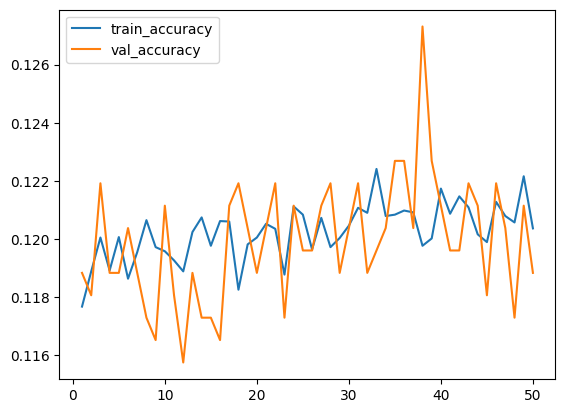

In [80]:
# Get the length of the accuracy data
epochs = len(result_df["accuracy"])

# Plot train and validation accuracy over epochs
plt.plot(range(1, epochs + 1), result_df["accuracy"], label="train_accuracy")
plt.plot(range(1, epochs + 1), result_df["val_accuracy"], label="val_accuracy")

# Add legend and show the plot
plt.legend()
plt.show()
